<a href="https://colab.research.google.com/github/FaiqaRashid99/SleepDisorderClassification/blob/main/SleepDisOrder(withoutAugmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying Machine Learning Algorithms for the Classification of Sleep Disorders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

This
study proposes an optimised method for the Classification of Sleep Disorders.

**Dataset:**

It Uses the **Sleep Health and Lifestyle Dataset** publicly available online to evaluate the proposed model.
The dataset includes 400 rows and 13 columns with various features representing sleep and daily activities.

**Algorithms Used:**

The k-nearest neighbours, support vector machine, decision tree, random forest and artificial neural network (ANN) deep learning algorithms were assessed.

**Proposed Model in Paper:**

* Genetic Algorithm for Hyperparameter tuning.

**Comparison with other models:**

* Grid Search
* Random Search





In [ ]:
import os
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Load Dataset
file_path = '/content/drive/MyDrive/Datasets/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
# Replace NaN values in Sleep Disorder with "No Disorder"
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [ ]:
print('Unique Values of Occupation are', df['Occupation'].unique())

print('\nUnique Values of BMI Category are', df['BMI Category'].unique())

print('\nUnique Values of Sleep Disorder are', df['Sleep Disorder'].unique())

Unique Values of Occupation are ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique Values of BMI Category are ['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique Values of Sleep Disorder are ['No Disorder' 'Sleep Apnea' 'Insomnia']


In [ ]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [ ]:
df = df.rename(columns={0: 'Upper_BP', 1: 'Lower_BP'})

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper_BP,Lower_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [ ]:
df['Upper_BP'] = df['Upper_BP'].astype(float)
df['Lower_BP'] = df['Lower_BP'].astype(float)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper_BP,Lower_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [ ]:
# Missing Values
missing_values=df.isnull().sum()
missing_values

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0


**Data Preprocessing**

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Encode categorical variables
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])


In [ ]:
# Display the dataset after encoding
print("\nDataset after encoding:\n")
df.head()


Dataset after encoding:



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper_BP,Lower_BP
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0


In [ ]:
# Separate features and target variable
X = df.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

In [ ]:
# Encode target variable
y = encoder.fit_transform(y)

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Biasness Check

In [ ]:
# Check class distribution in the original dataset
print("Class distribution in the full dataset:")
print(pd.Series(y).value_counts())  # Convert y to a Pandas Series before value_counts()

# Check class distribution in the training set
print("\nClass distribution in the training set:")
print(pd.Series(y_train).value_counts())

# Check class distribution in the testing set
print("\nClass distribution in the testing set:")
print(pd.Series(y_test).value_counts())


Class distribution in the full dataset:
1    219
2     78
0     77
Name: count, dtype: int64

Class distribution in the training set:
1    157
0     53
2     51
Name: count, dtype: int64

Class distribution in the testing set:
1    62
2    27
0    24
Name: count, dtype: int64


**Balance the Classes**
Depending on your goal (e.g., building a classifier), you can balance the classes using one of these techniques:

Over-sampling: Increase the minority classes' sample size by duplicating or generating synthetic data. Use techniques like SMOTE (Synthetic Minority Oversampling Technique).

In [ ]:
# Apply SMOTE to balance the training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before SMOTE - Class distribution in y_train:")
# Convert y_train to a Pandas Series before calling value_counts()
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE - Class distribution in y_train_resampled:")
# Convert y_train_resampled to a Pandas Series before calling value_counts()
print(pd.Series(y_train_resampled).value_counts())


Before SMOTE - Class distribution in y_train:
1    157
0     53
2     51
Name: count, dtype: int64

After SMOTE - Class distribution in y_train_resampled:
1    157
2    157
0    157
Name: count, dtype: int64


In [ ]:
y_train = y_train_resampled
X_train = X_train_resampled

#Tables Results Calculations
Training, 5-Fold Cross-Validation, Testing

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize dictionaries to store results
training_results = []
cross_val_results = []
testing_results = []

ann_model = MLPClassifier(
    hidden_layer_sizes=(24,),  # Single hidden layer with 24 units
    activation='relu',         # ReLU activation function
    learning_rate_init=0.004,  # Initial learning rate
    max_iter=500,              # Maximum number of iterations
    random_state=42            # For reproducibility
)

# Models
model_dict = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='sigmoid', C=0.01, gamma='auto', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "ANN": ann_model
}

In [ ]:
# Training Phase (Table 3)
print("\nCalculating Training Phase Results...")
for model_name, model in model_dict.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    training_results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_train, train_pred),
        "Precision": precision_score(y_train, train_pred, average='weighted'),
        "Recall": recall_score(y_train, train_pred, average='weighted'),
        "F1-Score": f1_score(y_train, train_pred, average='weighted')
    })


Calculating Training Phase Results...


In [ ]:
# 5-Fold Cross-Validation Phase (Table 4)
print("\nPerforming 5-Fold Cross-Validation...")
for model_name, model in model_dict.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_results.append({
        "Model": model_name,
        "Mean Accuracy": np.mean(cv_scores),
        "Std Dev": np.std(cv_scores)
    })


Performing 5-Fold Cross-Validation...


In [ ]:
# Testing Phase (Table 5)
print("\nCalculating Testing Phase Results...")
for model_name, model in models.items():  # Iterate over model objects
    predictions = model.predict(X_test)  # Get predictions using the model
    testing_results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, predictions),  # Pass predictions, not the model
        "Precision": precision_score(y_test, predictions, average='weighted'),
        "Recall": recall_score(y_test, predictions, average='weighted'),
        "F1-Score": f1_score(y_test, predictions, average='weighted')
    })


Calculating Testing Phase Results...


In [ ]:
# Convert results to DataFrame for better readability
training_df = pd.DataFrame(training_results)
cross_val_df = pd.DataFrame(cross_val_results)
testing_df = pd.DataFrame(testing_results)

# Display Results
print("\nTable 3: Training Phase Results")
print(training_df)

print("\nTable 4: 5-Fold Cross-Validation Results")
print(cross_val_df)

print("\nTable 5: Testing Phase Results")
print(testing_df)


Table 3: Training Phase Results
           Model  Accuracy  Precision    Recall  F1-Score
0            KNN  0.938429   0.938554  0.938429  0.938447
1            SVM  0.690021   0.703555  0.690021  0.684112
2  Decision Tree  0.963907   0.963919  0.963907  0.963906
3  Random Forest  0.963907   0.963919  0.963907  0.963906
4            ANN  0.957537   0.957810  0.957537  0.957615

Table 4: 5-Fold Cross-Validation Results
           Model  Mean Accuracy   Std Dev
0            KNN       0.917357  0.040522
1            SVM       0.673281  0.104781
2  Decision Tree       0.904569  0.048645
3  Random Forest       0.925801  0.036466
4            ANN       0.940694  0.040814

Table 5: Testing Phase Results
           Model  Accuracy  Precision    Recall  F1-Score
0            KNN  0.867257   0.872753  0.867257  0.867801
1  Decision Tree  0.876106   0.878619  0.876106  0.874753
2  Random Forest  0.893805   0.895501  0.893805  0.892034
3            SVM  0.734513   0.777159  0.734513  0.748888
4  

# **Genetic Algorithm Implementation for Best Feature Selection**

GA is used to tune the parameters and solve optimization problems
This is a comprehensive problem that involves implementing several machine learning algorithms, hyperparameter optimization using **Genetic Algorithm (GA)**, and evaluating the models with various metrics, including t-tests and confusion matrices. Here's how we can approach this step by step in Python:

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15076 sha256=7636bee7170bd1aa2e823f8b7f71808357c20424de5294f59951be0db126e038
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [ ]:
from geneticalgorithm import geneticalgorithm as ga # Import the geneticalgorithm package
from sklearn.model_selection import cross_val_score


In [ ]:
# Genetic Algorithm Parameters
ga_params = {
    'max_num_iteration': 5,        # Number of generations
    'population_size': 12,         # Population size
    'mutation_probability': 0.8,   # Probability of mutation
    'elit_ratio': 0.2,             # Proportion of elite individuals
    'crossover_probability': 0.8,  # Probability of crossover
    'parents_portion': 0.3,        # Proportion of parents in the population
    'crossover_type': 'uniform',   # Type of crossover (uniform or one_point)
    'max_iteration_without_improv': None  # Stop if no improvement
}


**Fitness Function for GA**

In [ ]:
from sklearn.model_selection import StratifiedKFold

def fitness_function(params, model_name):
    """
    Evaluate model performance with the given parameters and selected features.
    """
    try:
        # Initialize the model based on the name
        if model_name == 'KNN':
            k = max(1, int(round(params[0])))  # Ensure k is at least 1
            metric = 'euclidean' if params[1] < 0.5 else 'manhattan'  # Choose metric
            model = KNeighborsClassifier(n_neighbors=k, metric=metric)

        elif model_name == 'SVM':
            C = max(0.1, params[0])  # Ensure C > 0
            gamma = max(1e-4, params[1])  # Ensure gamma > 0
            model = SVC(C=C, gamma=gamma, kernel='rbf')

        elif model_name == 'DT':
            max_depth = max(2, int(round(params[0])))  # Ensure at least depth of 2
            min_samples_split = max(2, int(round(params[1])))  # At least 2 samples
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

        elif model_name == 'RF':
            max_depth = max(2, int(round(params[0])))  # Ensure valid max depth
            min_samples_split = max(2, int(round(params[1])))  # At least 2 samples
            n_estimators = max(10, int(round(params[2])))  # At least 10 estimators
            model = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators)

        elif model_name == 'ANN':
            learning_rate_init = max(1e-4, params[0] / 1000)  # Scale and ensure positive learning rate
            hidden_layer_sizes = (max(1, int(round(params[1]))),)  # At least one neuron
            model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, max_iter=500)

        else:
            raise ValueError(f"Invalid model name: {model_name}")

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(
            model,
            X_train,
            y_train,
            cv=cv,
            scoring='accuracy'
        )

        # Log parameters and performance for debugging
        print(f"Model: {model_name}, Parameters: {params}, CV Score: {scores.mean()}")

        # Return the fitness value (1 - accuracy) to minimize error
        return 1 - scores.mean()

    except Exception as e:
        # Log the error and return a high penalty value for invalid configurations
        print(f"Error in fitness function for {model_name} with params {params}: {e}")
        return 1.0  # High penalty for failure


**Optimize Each Model**

**KNN**

Model: KNN, Parameters: [5.69467914 0.71547283], CV Score: 0.923538633818589
Model: KNN, Parameters: [29.72136126  0.08658627], CV Score: 0.8789473684210526
Model: KNN, Parameters: [6.22138688 0.29335192], CV Score: 0.9193281075027995
Model: KNN, Parameters: [26.79332351  0.16480752], CV Score: 0.8959686450167974
Model: KNN, Parameters: [25.92350821  0.20021488], CV Score: 0.8980963045912654
Model: KNN, Parameters: [7.38800062 0.67769224], CV Score: 0.9193057110862262
Model: KNN, Parameters: [9.59985385 0.46695199], CV Score: 0.9129675251959686
Model: KNN, Parameters: [22.56427161  0.96312963], CV Score: 0.889585666293393
Model: KNN, Parameters: [8.35946546 0.50437078], CV Score: 0.9193281075027995
Model: KNN, Parameters: [17.36348769  0.94173895], CV Score: 0.9023516237402015
Model: KNN, Parameters: [19.12928036  0.02288203], CV Score: 0.910862262038074
Model: KNN, Parameters: [6.10773579 0.03993098], CV Score: 0.9193281075027995
||||||||||________________________________________ 20.0

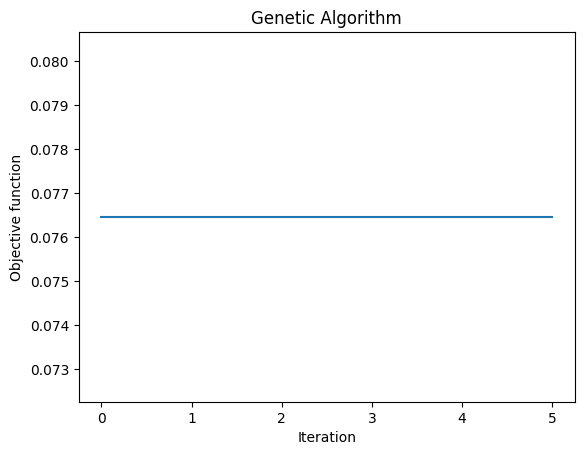

Optimized KNN Parameters:
k: 6, Metric: manhattan


In [ ]:
from geneticalgorithm import geneticalgorithm as ga
import numpy as np

def knn_optimization():
    # Define parameter bounds for GA
    varbound_knn = np.array([
        [1, 30],  # k: Number of neighbors
        [0, 1]    # Distance metric: 0 for Euclidean, 1 for Manhattan
    ])

    # Run GA for KNN
    ga_knn = ga(
        function=lambda x: fitness_function(x, 'KNN'),  # Use the fitness function defined earlier
        dimension=2,                   # Two parameters (k and distance metric)
        variable_type="real",          # Allows mixed integer/real values
        variable_boundaries=varbound_knn,
        algorithm_parameters=ga_params
    )
    ga_knn.run()

    # Return optimized parameters
    return ga_knn.output_dict['variable']

# Run the optimization
knn_best_params = knn_optimization()

# Extract the best parameters
best_k = int(round(knn_best_params[0]))
best_metric = "euclidean" if knn_best_params[1] < 0.5 else "manhattan"

# Print results
print("Optimized KNN Parameters:")
print(f"k: {best_k}, Metric: {best_metric}")


**SVM**

Model: SVM, Parameters: [6.44208904 0.03077741], CV Score: 0.9363045912653976
Model: SVM, Parameters: [4.92326918 0.05586942], CV Score: 0.9384322508398656
Model: SVM, Parameters: [0.85223461 0.00384578], CV Score: 0.8746696528555431
Model: SVM, Parameters: [4.21037174 0.03180828], CV Score: 0.9299440089585665
Model: SVM, Parameters: [7.20509837 0.00838126], CV Score: 0.9214781634938409
Model: SVM, Parameters: [2.18461068 0.03100343], CV Score: 0.9214557670772676
Model: SVM, Parameters: [1.42980535 0.09368223], CV Score: 0.9320716685330346
Model: SVM, Parameters: [4.54753507 0.00492424], CV Score: 0.9172228443449046
Model: SVM, Parameters: [3.14476763 0.07607475], CV Score: 0.9384322508398656
Model: SVM, Parameters: [8.33175357 0.01153489], CV Score: 0.9193281075027995
Model: SVM, Parameters: [6.31125155 0.01695963], CV Score: 0.9256886898096305
Model: SVM, Parameters: [5.52784828 0.06602499], CV Score: 0.9426875699888017
||||||||||________________________________________ 20.0% GA is r

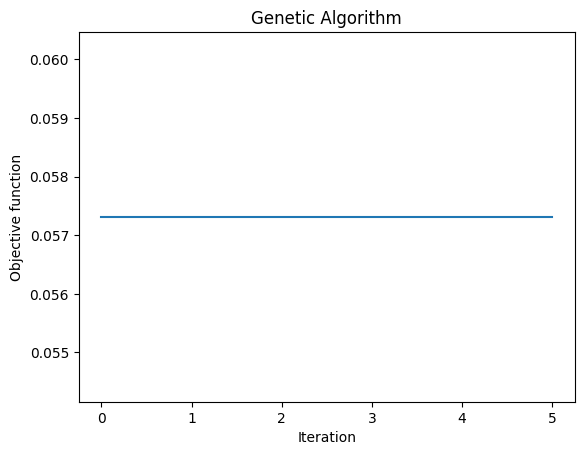

Optimized SVM Parameters (C, gamma): [5.52784828 0.06602499]


In [ ]:
def svm_optimization():
    # Parameter ranges for SVM: C, gamma
    varbound = np.array([[0.1, 10],  # Range for C : Regularization parameters, C controls the trade-off between achieving a low error on the training data (margin violations) and maintaining a large margin that generalizes well to unseen data. A smaller C emphasizes a larger margin by allowing more misclassified points (soft margin).
                         [0.001, 0.1]])  # Range for gamma: Kernel coefficient

    algorithm = ga(
        function=lambda x: fitness_function(x, 'SVM'),
        dimension=2,
        variable_type='real',
        variable_boundaries=varbound,
        algorithm_parameters=ga_params
    )
    algorithm.run()
    return algorithm.output_dict['variable']

svm_best_params = svm_optimization()
print("Optimized SVM Parameters (C, gamma):", svm_best_params)


**Decision Tree**

Model: DT, Parameters: [3. 2.], CV Score: 0.912922732362822
Model: DT, Parameters: [11.  7.], CV Score: 0.9172004479283314
Model: DT, Parameters: [7. 8.], CV Score: 0.9214557670772676
Model: DT, Parameters: [8. 3.], CV Score: 0.91505039193729
Model: DT, Parameters: [12. 10.], CV Score: 0.9193057110862263
Model: DT, Parameters: [13.  7.], CV Score: 0.9150727883538634
Model: DT, Parameters: [15.  6.], CV Score: 0.9214557670772676
Model: DT, Parameters: [11.  2.], CV Score: 0.921410974244121
Model: DT, Parameters: [10.  5.], CV Score: 0.9107950727883539
Model: DT, Parameters: [3. 5.], CV Score: 0.912922732362822
Model: DT, Parameters: [11.  2.], CV Score: 0.9086450167973125
Model: DT, Parameters: [13.  5.], CV Score: 0.9086898096304591
||||||||||________________________________________ 20.0% GA is running...Model: DT, Parameters: [4. 3.], CV Score: 0.9107950727883539
Model: DT, Parameters: [13.  5.], CV Score: 0.9108174692049273
Model: DT, Parameters: [14.  2.], CV Score: 0.91505039193729

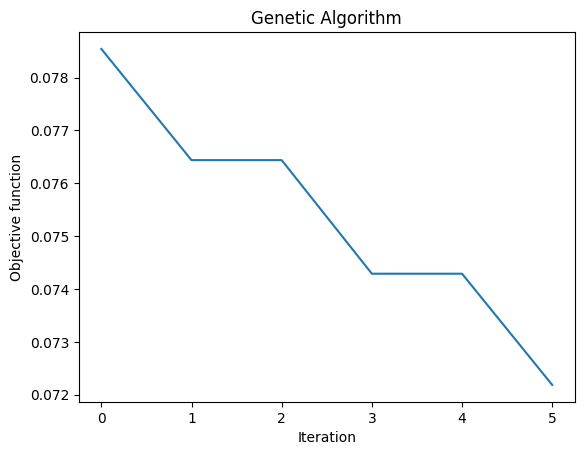

Optimized DT Parameters (max_depth, min_samples_split): [5. 5.]


In [ ]:
def dt_optimization():
    # Parameter ranges for Decision Tree: max_depth, min_samples_split
    varbound = np.array([[2, 15],  # Range for max_depth
                         [2, 10]])  # Range for min_samples_split

    algorithm = ga(
        function=lambda x: fitness_function(x, 'DT'),
        dimension=2,
        variable_type='int',
        variable_boundaries=varbound,
        algorithm_parameters=ga_params
    )
    algorithm.run()
    return algorithm.output_dict['variable']

dt_best_params = dt_optimization()
print("Optimized DT Parameters (max_depth, min_samples_split):", dt_best_params)


**Random Forest**

Model: RF, Parameters: [10.  3. 23.], CV Score: 0.9341769316909294
Model: RF, Parameters: [15.  7. 14.], CV Score: 0.9363045912653976
Model: RF, Parameters: [ 9.  2. 46.], CV Score: 0.9341321388577828
Model: RF, Parameters: [ 7.  2. 25.], CV Score: 0.9363045912653976
Model: RF, Parameters: [ 8.  9. 19.], CV Score: 0.9299216125419931
Model: RF, Parameters: [ 8.  3. 12.], CV Score: 0.9384322508398656
Model: RF, Parameters: [15.  9. 45.], CV Score: 0.9384098544232922
Model: RF, Parameters: [11.  2. 34.], CV Score: 0.9320492721164614
Model: RF, Parameters: [ 5.  2. 22.], CV Score: 0.9384322508398656
Model: RF, Parameters: [ 6.  3. 23.], CV Score: 0.9405599104143336
Model: RF, Parameters: [ 6.  3. 21.], CV Score: 0.9405375139977602
Model: RF, Parameters: [15.  5. 33.], CV Score: 0.942642777155655
||||||||||________________________________________ 20.0% GA is running...Model: RF, Parameters: [ 7.  2. 14.], CV Score: 0.9362821948488242
Model: RF, Parameters: [ 7.  8. 19.], CV Score: 0.9320492

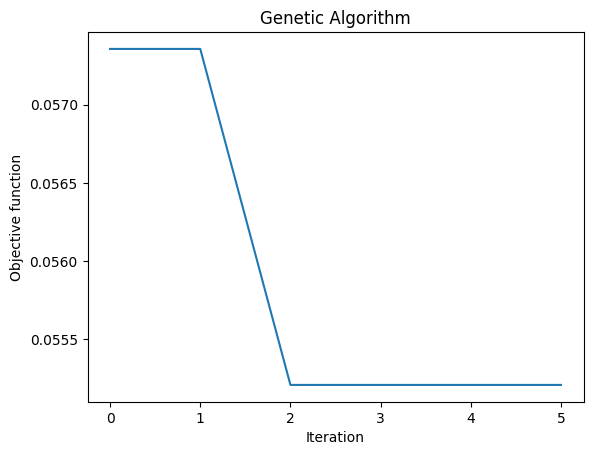

Optimized RF Parameters (max_depth, min_samples_split, n_estimators): [ 9.  5. 33.]


In [ ]:
def rf_optimization():
    # Parameter ranges for Random Forest: max_depth, min_samples_split, n_estimators
    varbound = np.array([[5, 15],     # Range for max_depth
                         [2, 10],     # Range for min_samples_split
                         [10, 50]])  # Range for n_estimators

    algorithm = ga(
        function=lambda x: fitness_function(x, 'RF'),
        dimension=3,
        variable_type='int',
        variable_boundaries=varbound,
        algorithm_parameters=ga_params
    )
    algorithm.run()
    return algorithm.output_dict['variable']

rf_best_params = rf_optimization()
print("Optimized RF Parameters (max_depth, min_samples_split, n_estimators):", rf_best_params)


**ANN**

Model: ANN, Parameters: [14.68355518 11.14488205], CV Score: 0.9448152295632699
Model: ANN, Parameters: [ 9.06053081 33.36919121], CV Score: 0.9448376259798433
Model: ANN, Parameters: [17.96096693 29.40190457], CV Score: 0.9363045912653977
Model: ANN, Parameters: [ 5.08536906 92.3006736 ], CV Score: 0.9426875699888019
Model: ANN, Parameters: [32.7919817  98.87960286], CV Score: 0.9384322508398657
Model: ANN, Parameters: [30.44721655 52.69707672], CV Score: 0.9469204927211645
Model: ANN, Parameters: [ 3.1173209  93.07396973], CV Score: 0.9426875699888019
Model: ANN, Parameters: [27.97144846 11.629982  ], CV Score: 0.9405599104143336
Model: ANN, Parameters: [ 6.90285833 77.24232645], CV Score: 0.9448152295632699
Model: ANN, Parameters: [ 3.07538877 47.88007098], CV Score: 0.9469428891377379
Model: ANN, Parameters: [22.90254486 62.26673075], CV Score: 0.9448152295632699
Model: ANN, Parameters: [18.10370675 28.11272317], CV Score: 0.9426875699888019
||||||||||______________________________

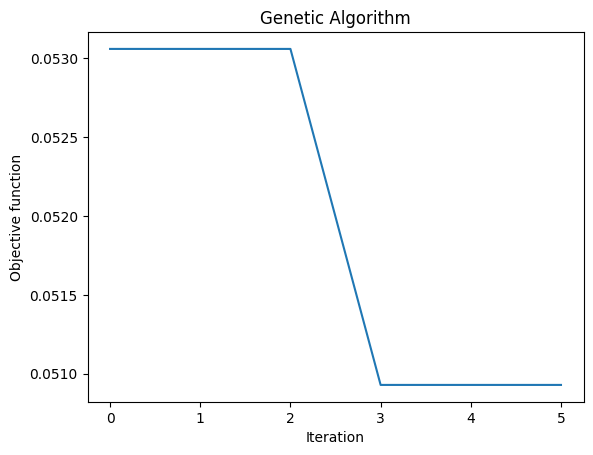

Optimized ANN Parameters (learning_rate_init): [ 3.44000644 45.09853913]


In [ ]:
def ann_optimization():
    # Parameter ranges for ANN: learning_rate_init
    varbound_ann = np.array([
    [1, 40],   # Range for learning_rate_init (scaled by 0.001)
    [10, 100]  # Range for hidden layer sizes
    ])
    algorithm = ga(
        function=lambda x: fitness_function(x, 'ANN'),
        dimension=2,
        variable_type='real',
        variable_boundaries=varbound_ann,
        algorithm_parameters=ga_params
    )
    algorithm.run()
    return algorithm.output_dict['variable']

ann_best_params = ann_optimization()
print("Optimized ANN Parameters (learning_rate_init):", ann_best_params)


In [ ]:
# Display optimized parameters
print(f"Optimized KNN Parameters: k={int(round(knn_best_params[0]))}, Metric={['euclidean', 'manhattan'][int(round(knn_best_params[1]))]}")
print(f"Optimized SVM Parameters: C={svm_best_params[0]}, Gamma={svm_best_params[1]}")
print(f"Optimized DT Parameters: Max Depth={int(round(dt_best_params[0]))}, Min Samples Split={int(round(dt_best_params[1]))}")
print(f"Optimized RF Parameters: Max Depth={int(round(rf_best_params[0]))}, Min Samples Split={int(round(rf_best_params[1]))}, N Estimators={int(round(rf_best_params[2]))}")
print(f"Optimized ANN Parameters: Learning Rate={ann_best_params[0] / 1000}, Hidden Layer Sizes={int(round(ann_best_params[1]))}")


Optimized KNN Parameters: k=6, Metric=manhattan
Optimized SVM Parameters: C=5.527848283679041, Gamma=0.06602498962380764
Optimized DT Parameters: Max Depth=5, Min Samples Split=5
Optimized RF Parameters: Max Depth=9, Min Samples Split=5, N Estimators=33
Optimized ANN Parameters: Learning Rate=0.00344000643553266, Hidden Layer Sizes=45


# Train Models with Optimized Parameters
Once the GA identifies the best parameters for each model, train and evaluate them using the full dataset.

In [ ]:
# Train models with optimized parameters
models = {
    'KNN': KNeighborsClassifier(n_neighbors=int(round(knn_best_params[0])), metric=['euclidean', 'manhattan'][int(round(knn_best_params[1]))]),
    'SVM': SVC(C=svm_best_params[0], gamma=svm_best_params[1], kernel='rbf'),
    'DT': DecisionTreeClassifier(max_depth=int(round(dt_best_params[0])), min_samples_split=int(round(dt_best_params[1]))),
    'RF': RandomForestClassifier(max_depth=int(round(rf_best_params[0])), min_samples_split=int(round(rf_best_params[1])), n_estimators=int(round(rf_best_params[2]))),
    'ANN': MLPClassifier(hidden_layer_sizes=(int(round(ann_best_params[1])),), learning_rate_init=ann_best_params[0] / 1000, max_iter=500)
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Model: KNN
Accuracy: 0.8849557522123894
Precision: 0.888922409940109
Recall: 0.8849557522123894
F1 Score: 0.884176679521366

Model: SVM
Accuracy: 0.8938053097345132
Precision: 0.8955009592177734
Recall: 0.8938053097345132
F1 Score: 0.8920342605720429

Model: DT
Accuracy: 0.8938053097345132
Precision: 0.8937452720308354
Recall: 0.8938053097345132
F1 Score: 0.8909422587722061

Model: RF
Accuracy: 0.8761061946902655
Precision: 0.877958404031578
Recall: 0.8761061946902655
F1 Score: 0.8718275219341458

Model: ANN
Accuracy: 0.911504424778761
Precision: 0.9109257998638529
Recall: 0.911504424778761
F1 Score: 0.9102050687183103



Model: KNN
Accuracy: 0.8849557522123894
Precision: 0.888922409940109
Recall: 0.8849557522123894
F1 Score: 0.884176679521366

Model: SVM
Accuracy: 0.8938053097345132
Precision: 0.8955009592177734
Recall: 0.8938053097345132
F1 Score: 0.8920342605720429

Model: DT
Accuracy: 0.8938053097345132
Precision: 0.8937452720308354
Recall: 0.8938053097345132
F1 Score: 0.8909422587722061

Model: RF
Accuracy: 0.8761061946902655
Precision: 0.877958404031578
Recall: 0.8761061946902655
F1 Score: 0.8718275219341458

Model: ANN
Accuracy: 0.911504424778761
Precision: 0.9109257998638529
Recall: 0.911504424778761
F1 Score: 0.9102050687183103


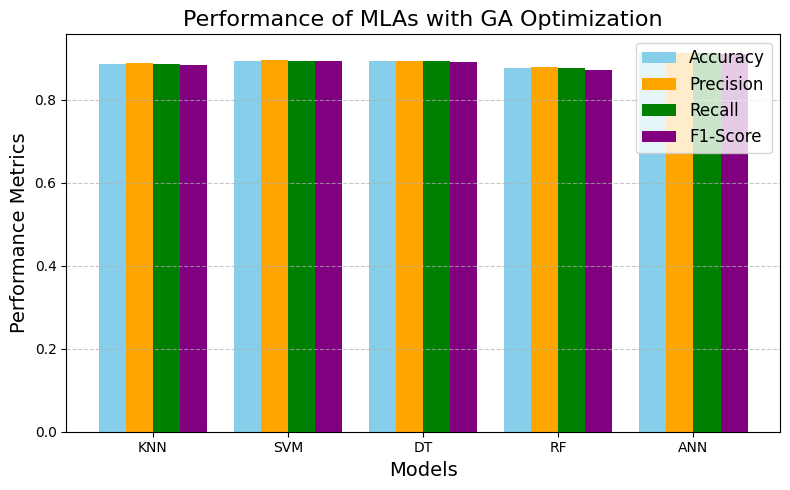

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = []
precision = []
recall = []
f1_score_list = []  # Changed variable name to avoid conflict with function

for name, model in models.items():
    y_pred = model.predict(X_test)  # Calculate y_pred for each model

    # Store the metric values in lists
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))
    f1_score_list.append(f1_score(y_test, y_pred, average='weighted'))

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy[-1])  # Print the last added values
    print("Precision:", precision[-1])
    print("Recall:", recall[-1])
    print("F1 Score:", f1_score_list[-1])

# Bar width
bar_width = 0.2

# X positions for the groups
x = np.arange(len(models))

# Create the plot
plt.figure(figsize=(8, 5))

# Plot each metric as a separate group
plt.bar(x - bar_width, accuracy, width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x, precision, width=bar_width, label='Precision', color='orange')
plt.bar(x + bar_width, recall, width=bar_width, label='Recall', color='green')
plt.bar(x + 2 * bar_width, f1_score_list, width=bar_width, label='F1-Score', color='purple') # Changed variable name here

# Customize the plot
plt.xticks(x + bar_width / 2, models)  # Position x-axis labels
plt.xlabel('Models', fontsize=14)
plt.ylabel('Performance Metrics', fontsize=14)
plt.title('Performance of MLAs with GA Optimization', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# T-Test Analysis

In [ ]:
from scipy.stats import ttest_ind

# Helper function to perform and display t-test results
def perform_t_test(y_true, y_pred, model_name):
    """
    Perform a t-test between the true labels and predicted labels.
    """
    t_stat, p_value = ttest_ind(y_true, y_pred)
    print(f"\nModel: {model_name}")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")


# Evaluate models and perform t-tests
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Perform t-test
    perform_t_test(y_test, y_pred, name)



Model: KNN
T-Statistic: 0.7977
P-Value: 0.4259

Model: SVM
T-Statistic: 0.7012
P-Value: 0.4839

Model: DT
T-Statistic: 0.5057
P-Value: 0.6135

Model: RF
T-Statistic: 0.9116
P-Value: 0.3629

Model: ANN
T-Statistic: 0.3003
P-Value: 0.7642


**Accuracy and Loss Check**

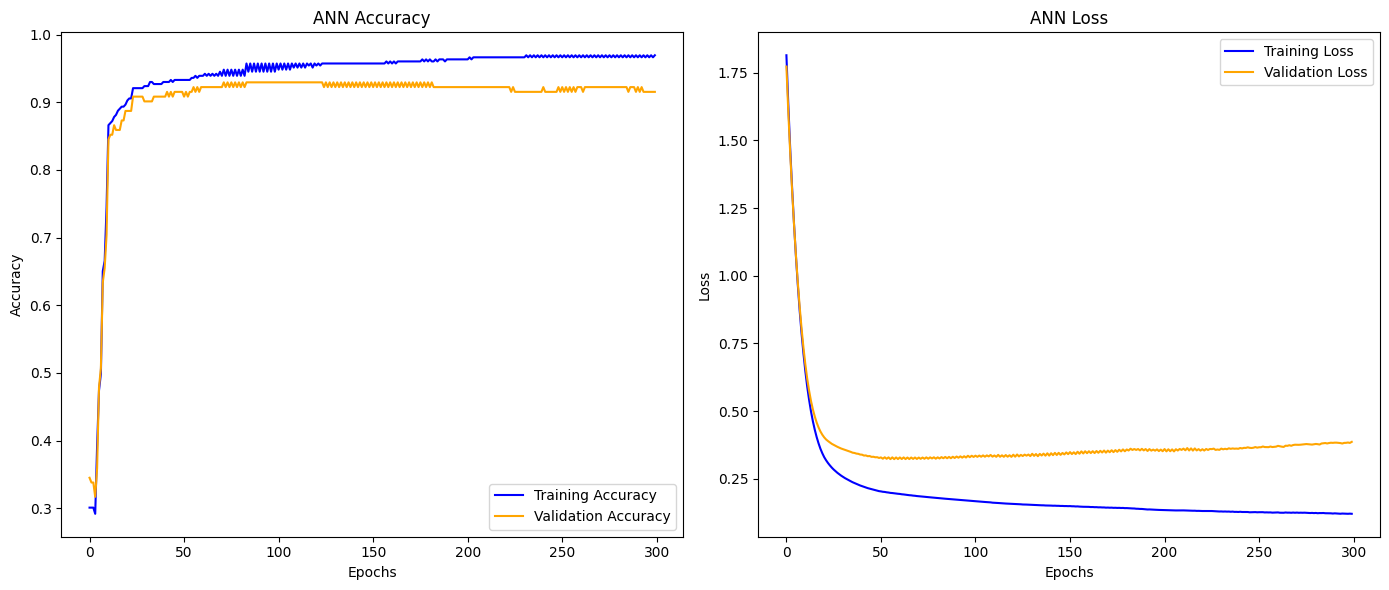

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

# Define ANN with partial fit capability
ann_model = MLPClassifier(
    hidden_layer_sizes=(24,),
    activation='relu',
    learning_rate_init=0.004,
    max_iter=1,  # Set max_iter=1 to enable iterative training
    warm_start=True,  # Allow partial fitting
    random_state=42
)

# Manually track performance
epochs = 300
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

for epoch in range(epochs):
    ann_model.fit(X_train_split, y_train_split)

    # Training performance
    train_pred = ann_model.predict(X_train_split)
    train_loss = log_loss(y_train_split, ann_model.predict_proba(X_train_split))
    train_acc = accuracy_score(y_train_split, train_pred)

    # Validation performance
    val_pred = ann_model.predict(X_val_split)
    val_loss = log_loss(y_val_split, ann_model.predict_proba(X_val_split))
    val_acc = accuracy_score(y_val_split, val_pred)

    # Store metrics
    training_loss.append(train_loss)
    validation_loss.append(val_loss)
    training_accuracy.append(train_acc)
    validation_accuracy.append(val_acc)

# Plot Training vs Validation Curves
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs), training_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(epochs), validation_accuracy, label='Validation Accuracy', color='orange')
plt.title("ANN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs), training_loss, label='Training Loss', color='blue')
plt.plot(range(epochs), validation_loss, label='Validation Loss', color='orange')
plt.title("ANN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Step 6: Feature Importance (for Random Forest)
print("\nFeature Importance for Random Forest:")
feature_importances = forest_model.feature_importances_
feature_names = df.drop(['Person ID', 'Sleep Disorder'], axis=1).columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)



Feature Importance for Random Forest:
                    Feature  Importance
10                 Upper_BP    0.196168
7              BMI Category    0.155120
11                 Lower_BP    0.125801
5   Physical Activity Level    0.110314
1                       Age    0.080634
9               Daily Steps    0.079427
3            Sleep Duration    0.071821
2                Occupation    0.068272
8                Heart Rate    0.037088
4          Quality of Sleep    0.036183
6              Stress Level    0.030852
0                    Gender    0.008321


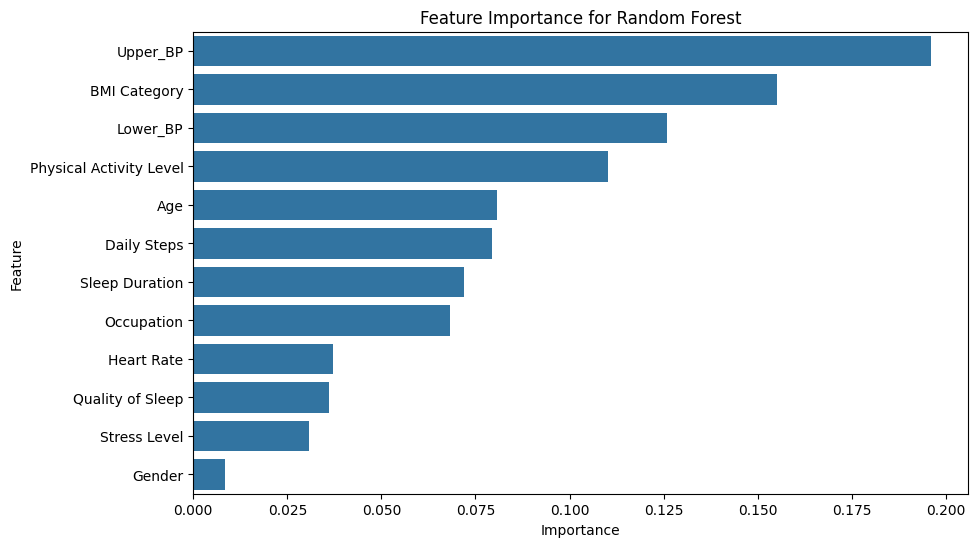

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Random Forest')
plt.show()

# **1. CONTRIBUTION TO PAPER**

# **CONTRIBUTION TO PAPER**

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from skopt import BayesSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
from pprint import pprint

In [ ]:
y_train = y_train_resampled
X_train = X_train_resampled

In [ ]:
grid_param_spaces = {
    'KNN': {'n_neighbors': list(range(1, 31)), 'metric': ['euclidean', 'manhattan']},
    'SVM': {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
    'DT': {'max_depth': list(range(2, 20)), 'min_samples_split': list(range(2, 10)), 'criterion': ['gini', 'entropy']},
    'RF': {'max_depth': list(range(5, 25)), 'min_samples_split': list(range(2, 20)), 'n_estimators': [10, 50, 100, 200]},
    'ANN': {
        'hidden_layer_sizes': [(24,), (50,), (100,), (200,)],
        'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
        'max_iter': [500, 1000, 2000, 3000]
    }
}


In [ ]:
random_param_spaces = {
    'KNN': {'n_neighbors': list(range(1, 31)), 'metric': ['euclidean', 'manhattan']},
    'SVM': {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
    'DT': {'max_depth': list(range(2, 20)), 'min_samples_split': list(range(2, 10)), 'criterion': ['gini', 'entropy']},
    'RF': {'max_depth': list(range(5, 25)), 'min_samples_split': list(range(2, 20)), 'n_estimators': [10, 50, 100, 200]},
    'ANN': {
        'hidden_layer_sizes': [(24,), (50,), (100,), (200,)],
        'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
        'max_iter': [500, 1000, 2000, 3000]
    }
}


**2. Define Functions for Grid and Random Search Optimization**

In [ ]:
def optimize_with_grid_search(model, params, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    grid_search_results = grid_search.cv_results_  # This contains detailed results from the grid search
    return grid_search.best_estimator_, grid_search.best_score_

def optimize_with_random_search(model, params, X_train, y_train):
    n_iter = min(50, np.prod([len(v) for v in params.values() if isinstance(v, list)]))  # Cap iterations
    random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=n_iter, cv=5, scoring='accuracy', verbose=1, random_state=42)
    random_search.fit(X_train, y_train)
    random_search_results = random_search.cv_results_  # This contains detailed results from the random search
    return random_search.best_estimator_, random_search.best_score_


**3. Define Models**

In [ ]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'ANN': MLPClassifier(hidden_layer_sizes=(100, 200), learning_rate_init=0.01, max_iter=3000, early_stopping=True, random_state=42)
}

**4. Optimize Models Using Grid Search and Random Search**

In [ ]:
results = {'Grid Search': {}, 'Random Search': {}}
grid_optimized_params = {}
random_optimized_params = {}

# Iterate over models for optimization
for model_name, model in models.items():
    print(f"\nOptimizing {model_name}...")
    # Grid Search Optimization
    best_model, best_score = optimize_with_grid_search(model, grid_param_spaces[model_name], X_train, y_train)
    results['Grid Search'][model_name] = {'Model': best_model, 'Score': best_score}
    grid_optimized_params[model_name] = best_model.get_params()

    # Random Search Optimization
    best_model, best_score = optimize_with_random_search(model, random_param_spaces[model_name], X_train, y_train)
    results['Random Search'][model_name] = {'Model': best_model, 'Score': best_score}
    random_optimized_params[model_name] = best_model.get_params()


Optimizing KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Optimizing SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits

Optimizing DT...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Optimizing RF...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Optimizing ANN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


**5. Train and Evaluate the Optimized Models**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import NotFittedError

# Select the optimization method: 'grid' or 'random'
optimization_method = 'grid'  # Change to 'random' if you want to use random search parameters

# Determine which parameter set to use
if optimization_method == 'grid':
    optimized_params = grid_optimized_params
elif optimization_method == 'random':
    optimized_params = random_optimized_params
else:
    raise ValueError("Invalid optimization method. Choose 'grid' or 'random'.")

models_with_params = {}

# Apply the optimized parameters to train and evaluate models
for model_name, model in models.items():
    print(f"\nApplying {optimization_method} optimized parameters to {model_name}...")
    params = optimized_params.get(model_name, {})

    try:
        if model_name == 'KNN':
            models_with_params[model_name] = KNeighborsClassifier(
                n_neighbors=params.get('n_neighbors', 5),  # Default to 5 if not found
                metric=params.get('metric', 'minkowski'),  # Default to 'minkowski' if not optimized
                weights=params.get('weights', 'uniform')  # Default to 'uniform' if not optimized
            )
        elif model_name == 'SVM':
            models_with_params[model_name] = SVC(
                C=params.get('C', 1.0),
                kernel=params.get('kernel', 'rbf'),
                gamma=params.get('gamma', 'scale'),
                probability=True  # Enable probability predictions if needed
            )
        elif model_name == 'DT':
            models_with_params[model_name] = DecisionTreeClassifier(
                max_depth=params.get('max_depth', None),
                criterion=params.get('criterion', 'gini'),
                min_samples_split=params.get('min_samples_split', 2)
            )
        elif model_name == 'RF':
            models_with_params[model_name] = RandomForestClassifier(
                n_estimators=params.get('n_estimators', 100),
                max_depth=params.get('max_depth', None),
                min_samples_split=params.get('min_samples_split', 2),
                random_state=42
            )
        elif model_name == 'ANN':
            models_with_params[model_name] = MLPClassifier(
                hidden_layer_sizes=params.get('hidden_layer_sizes', (100,)),
                learning_rate_init=params.get('learning_rate_init', 0.001),
                max_iter=params.get('max_iter', 200),
                random_state=42,
                early_stopping=params.get('early_stopping', False)  # Consistent with optimized params
            )
        else:
            print(f"Model {model_name} is not recognized and will be skipped.")
    except KeyError as e:
        print(f"Missing parameter for {model_name}: {e}. Skipping this model.")
        continue

# Train and evaluate models
for name, model in models_with_params.items():
    print(f"\nTraining and Evaluating Model: {name}")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    except NotFittedError as e:
        print(f"Model {name} could not be trained: {e}")
    except Exception as e:
        print(f"An error occurred during training or evaluation for {name}: {e}")



Applying grid optimized parameters to KNN...

Applying grid optimized parameters to SVM...

Applying grid optimized parameters to DT...

Applying grid optimized parameters to RF...

Applying grid optimized parameters to ANN...

Training and Evaluating Model: KNN
Accuracy: 0.8673
Precision: 0.8728
Recall: 0.8673
F1 Score: 0.8678

Training and Evaluating Model: SVM
Accuracy: 0.8938
Precision: 0.8959
Recall: 0.8938
F1 Score: 0.8932

Training and Evaluating Model: DT
Accuracy: 0.8761
Precision: 0.8771
Recall: 0.8761
F1 Score: 0.8710

Training and Evaluating Model: RF
Accuracy: 0.8938
Precision: 0.8955
Recall: 0.8938
F1 Score: 0.8920

Training and Evaluating Model: ANN
Accuracy: 0.9027
Precision: 0.9036
Recall: 0.9027
F1 Score: 0.9027


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import NotFittedError

# Select the optimization method: 'grid' or 'random'
optimization_method = 'random'

# Determine which parameter set to use
if optimization_method == 'grid':
    optimized_params = grid_optimized_params
elif optimization_method == 'random':
    optimized_params = random_optimized_params
else:
    raise ValueError("Invalid optimization method. Choose 'grid' or 'random'.")

models_with_params = {}

# Apply the optimized parameters to train and evaluate models
for model_name, model in models.items():
    print(f"\nApplying {optimization_method} optimized parameters to {model_name}...")
    params = optimized_params.get(model_name, {})

    try:
        if model_name == 'KNN':
            models_with_params[model_name] = KNeighborsClassifier(
                n_neighbors=params.get('n_neighbors', 5),  # Default to 5 if not found
                metric=params.get('metric', 'minkowski'),  # Default to 'minkowski' if not optimized
                weights=params.get('weights', 'uniform')  # Default to 'uniform' if not optimized
            )
        elif model_name == 'SVM':
            models_with_params[model_name] = SVC(
                C=params.get('C', 1.0),
                kernel=params.get('kernel', 'rbf'),
                gamma=params.get('gamma', 'scale'),
                probability=True  # Enable probability predictions if needed
            )
        elif model_name == 'DT':
            models_with_params[model_name] = DecisionTreeClassifier(
                max_depth=params.get('max_depth', None),
                criterion=params.get('criterion', 'gini'),
                min_samples_split=params.get('min_samples_split', 2)
            )
        elif model_name == 'RF':
            models_with_params[model_name] = RandomForestClassifier(
                n_estimators=params.get('n_estimators', 100),
                max_depth=params.get('max_depth', None),
                min_samples_split=params.get('min_samples_split', 2),
                random_state=42
            )
        elif model_name == 'ANN':
            models_with_params[model_name] = MLPClassifier(
                hidden_layer_sizes=params.get('hidden_layer_sizes', (100,)),
                learning_rate_init=params.get('learning_rate_init', 0.001),
                max_iter=params.get('max_iter', 200),
                random_state=42,
                early_stopping=params.get('early_stopping', False)  # Consistent with optimized params
            )
        else:
            print(f"Model {model_name} is not recognized and will be skipped.")
    except KeyError as e:
        print(f"Missing parameter for {model_name}: {e}. Skipping this model.")
        continue

# Train and evaluate models
for name, model in models_with_params.items():
    print(f"\nTraining and Evaluating Model: {name}")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    except NotFittedError as e:
        print(f"Model {name} could not be trained: {e}")
    except Exception as e:
        print(f"An error occurred during training or evaluation for {name}: {e}")



Applying random optimized parameters to KNN...

Applying random optimized parameters to SVM...

Applying random optimized parameters to DT...

Applying random optimized parameters to RF...

Applying random optimized parameters to ANN...

Training and Evaluating Model: KNN
Accuracy: 0.8850
Precision: 0.8889
Recall: 0.8850
F1 Score: 0.8842

Training and Evaluating Model: SVM
Accuracy: 0.8938
Precision: 0.8937
Recall: 0.8938
F1 Score: 0.8909

Training and Evaluating Model: DT
Accuracy: 0.8938
Precision: 0.8981
Recall: 0.8938
F1 Score: 0.8905

Training and Evaluating Model: RF
Accuracy: 0.8938
Precision: 0.8955
Recall: 0.8938
F1 Score: 0.8920

Training and Evaluating Model: ANN
Accuracy: 0.8938
Precision: 0.8938
Recall: 0.8938
F1 Score: 0.8938


**6. Compare the Results**

          Method Model     Score
0    Grid Search   KNN  0.867257
1    Grid Search   SVM  0.893805
2    Grid Search    DT  0.876106
3    Grid Search    RF  0.876106
4    Grid Search   ANN  0.902655
5  Random Search   KNN  0.884956
6  Random Search   SVM  0.893805
7  Random Search    DT  0.911504
8  Random Search    RF  0.893805
9  Random Search   ANN  0.893805


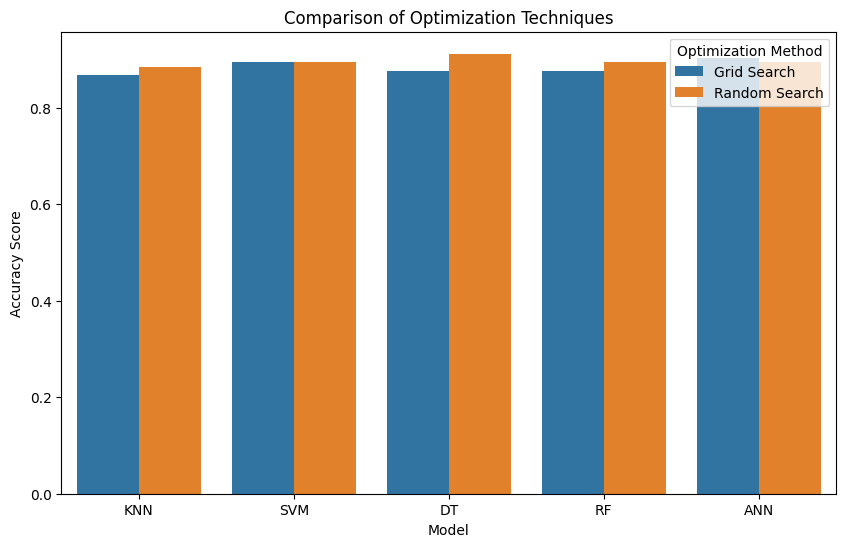

In [ ]:
# Aggregate results based on test set performance
comparison_results = []
for method, method_results in results.items():
    for model_name, model_data in method_results.items():
        comparison_results.append({
            'Method': method,
            'Model': model_name,
            'Score': accuracy_score(y_test, model_data['Model'].predict(X_test))  # Test accuracy
        })
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

# Visualize Results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Method', data=comparison_df)
plt.title('Comparison of Optimization Techniques')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.legend(title='Optimization Method')
plt.show()


**7. Statistical Comparison (T-test)**

In [ ]:
from scipy.stats import ttest_rel

# Example: Compare Grid Search and Random Search for KNN
# Ensure common models are present in both methods
common_models = list(set(results['Grid Search'].keys()) & set(results['Random Search'].keys()))

grid_scores = [results['Grid Search'][model]['Score'] for model in common_models]
random_scores = [results['Random Search'][model]['Score'] for model in common_models]

# Check if there are enough data points for a meaningful t-test
if len(grid_scores) >= 2 and len(random_scores) >= 2:
    t_stat, p_value = ttest_rel(grid_scores, random_scores)
    print(f"\nT-Test between Grid Search and Random Search:")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")
else:
    print("\nNot enough common models or data points to perform a meaningful t-test.")

# p-value is greater than 0.05, it suggests that there is no significant difference between the two methods.


T-Test between Grid Search and Random Search:
T-Statistic: -2.1324
P-Value: 0.0999


In [ ]:
import pandas as pd

# Results dictionaries for each optimization method
ga_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Optimization Method': []
}

grid_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Optimization Method': []
}

random_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Optimization Method': []
}

# Evaluate GA results
# Iterate over the models and store results in ga_results
for name, model in models.items():
  if not hasattr(model, "_fit_method") or model._fit_method is None:  # Check if model is fitted
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)  # Calculate y_pred for each model
        ga_results['Model'].append(name)
        ga_results['Accuracy'].append(accuracy_score(y_test, y_pred))
        ga_results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
        ga_results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
        ga_results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
        ga_results['Optimization Method'].append('GA')  # Add optimization method


# Evaluate Grid Search results (you should already have these results from your previous code)
# `grid_search_results` contains the model evaluation results from Grid Search
for grid_search_obj, model_name in grid_search_results:  # Unpack the tuple correctly
    best_model = grid_search_obj.best_estimator_
    y_pred = best_model.predict(X_test)

    grid_results['Model'].append(model_name)
    grid_results['Accuracy'].append(accuracy_score(y_test, y_pred))
    grid_results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    grid_results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    grid_results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
    grid_results['Optimization Method'].append('Grid Search')

for model_name, model_params in optimized_params.items():
    if model_name in models_with_params:
        model = models_with_params[model_name]  # Get the model from models_with_params
        y_pred = model.predict(X_test)

        random_results['Model'].append(model_name)
        random_results['Accuracy'].append(accuracy_score(y_test, y_pred))
        random_results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
        random_results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
        random_results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
        random_results['Optimization Method'].append('Random Search')

# Combine all results into one DataFrame using pd.concat
all_results = pd.concat([pd.DataFrame(ga_results),
                         pd.DataFrame(grid_results),
                         pd.DataFrame(random_results)], ignore_index=True)


# Show the combined DataFrame for comparison
print(all_results)

   Model  Accuracy  Precision    Recall  F1 Score Optimization Method
0    KNN  0.867257   0.872753  0.867257  0.867801                  GA
1    SVM  0.876106   0.882759  0.876106  0.876375                  GA
2     DT  0.858407   0.861580  0.858407  0.854814                  GA
3     RF  0.893805   0.895501  0.893805  0.892034                  GA
4    ANN  0.911504   0.911195  0.911504  0.910905                  GA
5     RF  0.893805   0.895501  0.893805  0.892034         Grid Search
6     DT  0.893805   0.893745  0.893805  0.890942         Grid Search
7    SVM  0.876106   0.882759  0.876106  0.876375         Grid Search
8    ANN  0.902655   0.903319  0.902655  0.902067         Grid Search
9    KNN  0.876106   0.882759  0.876106  0.876375         Grid Search
10   KNN  0.884956   0.888922  0.884956  0.884177       Random Search
11   SVM  0.893805   0.893745  0.893805  0.890942       Random Search
12    DT  0.893805   0.898074  0.893805  0.890491       Random Search
13    RF  0.893805  

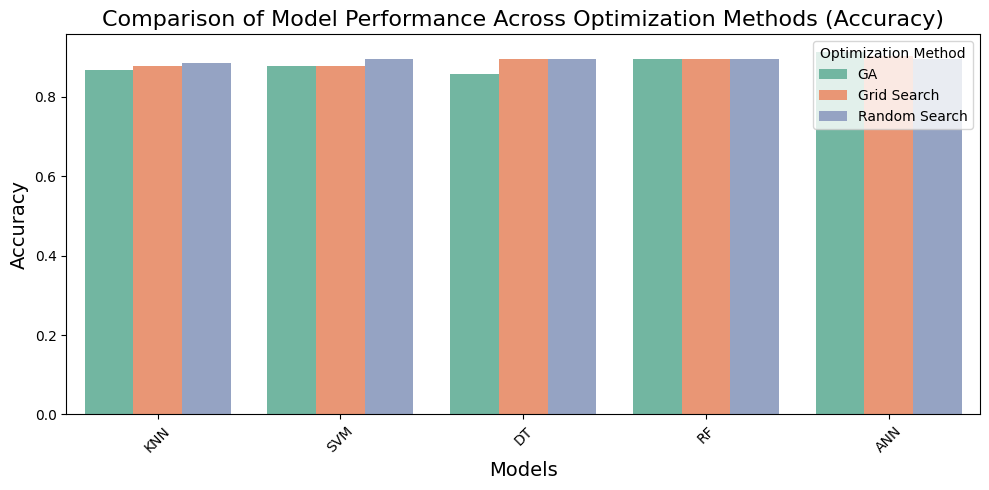

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a barplot comparing all models under each optimization method
sns.barplot(x='Model', y='Accuracy', hue='Optimization Method', data=all_results, palette='Set2')
plt.title('Comparison of Model Performance Across Optimization Methods (Accuracy)', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


